In [1]:
#load pandas and the data into jupyter
import pandas as pd
import geopandas as gpd

street_sign_data = pd.read_csv("streetSigns.csv", index_col="id")

In [2]:
#displaying the number of street signs per neightborhood
street_sign_data['neighborhood'].value_counts()

South Side Flats             3672
Bloomfield                   3627
Central Business District    3491
Shadyside                    3370
Squirrel Hill South          3281
                             ... 
Ridgemont                      62
Chartiers City                 44
Glen Hazel                     38
Arlington Heights              21
Mount Oliver Borough           17
Name: neighborhood, Length: 91, dtype: int64

In [3]:
#grouping the different neighborhoods together and summing the number of signs
ssd = street_sign_data.groupby("neighborhood").sum()['num_signs']
ssd.sort_values(ascending=True)

neighborhood
Mount Oliver Borough           17
Arlington Heights              21
Glen Hazel                     38
Chartiers City                 44
Ridgemont                      62
                             ... 
Squirrel Hill South          3281
Shadyside                    3370
Central Business District    3491
Bloomfield                   3627
South Side Flats             3672
Name: num_signs, Length: 91, dtype: int64

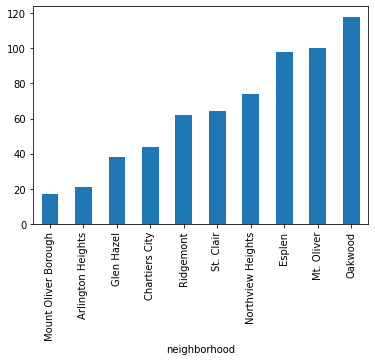

In [4]:
#showing a bar chart of the top 10 best neighborhoods
ssdSorted = ssd.sort_values(ascending=True).head(10)
ssdSorted.plot.bar()

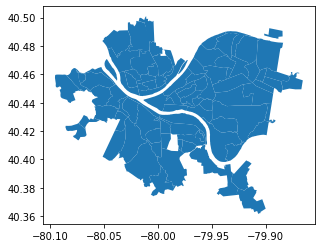

In [5]:
#creating a blank map of pittsbugh
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

In [6]:
#merging the data with the map of pittsburgh
ssd_map = neighborhoods.merge(ssd, how='left', left_on='hood', right_on='neighborhood')
ssd_map[['hood', 'num_signs', 'geometry']].head()

,hood,num_signs,geometry
0,Central Oakland,1327,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,1743,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,486,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,784,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,1366,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


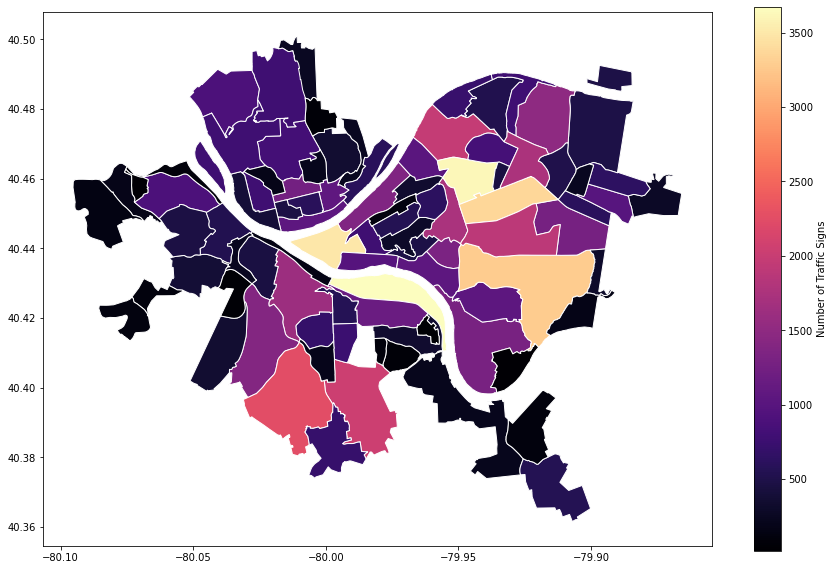

In [7]:
#drawing the map based on number of traffic signs
ssd_map.plot(column='num_signs',
             cmap='magma',
             edgecolor='white',
             legend=True,
             legend_kwds={'label': 'Number of Traffic Signs'},
             figsize=(15,10))

In [8]:
#reading in the second data set based on reports in neighborhoods
report_data = pd.read_csv("reports.csv", index_col="_id", low_memory=False)

In [9]:
#sorting the data so that only reports about the neighborhood streets show
report_query = report_data['REQUEST_TYPE'].str.contains('street | Street | road | Road', na=False)
rdSorted = report_data[report_query]
rdSorted.head(10)

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY,NUM_REPORTS
_id,,,,,,,,,,,,,,,,,,
813427,692675,2022-11-09T11:33:00,Tree Fallen Across Road,Call Center,0,DPW - Street Maintenance,South Side Slopes,3.0,17.0,4.200317e+10,3.0,17.0,3.0,3-Apr,-79.979866,40.423389,EXACT,1
813425,692673,2022-11-09T11:31:00,Tree Fallen Across Road,Call Center,0,DPW - Street Maintenance,New Homestead,5.0,31.0,4.200331e+10,3.0,31.0,4.0,20-Apr,-79.917412,40.398570,EXACT,1
813133,692444,2022-11-08T14:28:00,"Crosswalk and Street Markings, Maintenance",Control Panel,3,DOMI - TrafficShop,Shadyside,8.0,7.0,4.200307e+10,2.0,7.0,4.0,9-Feb,-79.944087,40.448622,APPROXIMATE,1
813011,692322,2022-11-08T10:45:00,Tree Fallen Across Road,Call Center,3,DPW - Street Maintenance,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,28-Apr,-80.021714,40.405161,EXACT,1
812737,692121,2022-11-07T15:17:00,Tree Fallen Across Road,Call Center,0,DPW - Street Maintenance,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,28-Apr,-80.021551,40.406844,EXACT,1
812506,691891,2022-11-07T10:26:00,"Crosswalk and Street Markings, Maintenance",Report2Gov iOS,3,DOMI - TrafficShop,Squirrel Hill South,5.0,14.0,4.200314e+10,3.0,14.0,4.0,21-Feb,-79.921050,40.431281,APPROXIMATE,1
812490,691875,2022-11-07T10:10:00,Tree Fallen Across Road,Call Center,3,DPW - Street Maintenance,Homewood West,9.0,12.0,4.200312e+10,2.0,12.0,5.0,17-Mar,-79.904038,40.459278,EXACT,1
812074,691691,2022-11-05T18:35:00,Tree Fallen Across Road,Website,3,DPW - Street Maintenance,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,28-Apr,-80.021725,40.405389,EXACT,1
811618,691516,2022-11-04T13:22:00,"Crosswalk and Street Markings, Maintenance",Call Center,3,DOMI - TrafficShop,Perry North,1.0,26.0,4.200326e+10,1.0,26.0,1.0,15-Jan,-80.011643,40.480551,APPROXIMATE,1


In [10]:
#grouping them by neighborhood and summing the number of reports
rdSorted2 = rdSorted.groupby("NEIGHBORHOOD").sum()['NUM_REPORTS']
rdSorted2.sort_values(ascending=True)

NEIGHBORHOOD
Windgap                 1
Glen Hazel              1
Lower Lawrenceville     1
Middle Hill             1
Mt. Oliver              1
                       ..
Squirrel Hill North    19
Beltzhoover            19
Beechview              21
Bloomfield             37
Squirrel Hill South    45
Name: NUM_REPORTS, Length: 82, dtype: int64

In [11]:
#merging the data with the map of pittsburgh
rd_map = neighborhoods.merge(rdSorted2, how='left', left_on='hood', right_on='NEIGHBORHOOD')
rd_map[['hood', 'NUM_REPORTS', 'geometry']].head()

,hood,NUM_REPORTS,geometry
0,Central Oakland,1.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,3.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,1.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,5.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


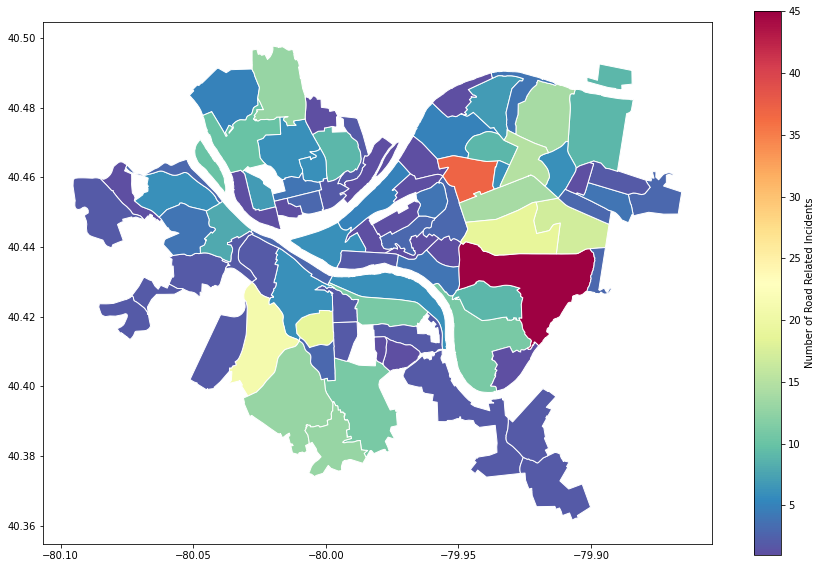

In [18]:
rd_map.plot(column='NUM_REPORTS',
             cmap='Spectral_r',
             edgecolor='white',
             legend=True,
             legend_kwds={'label': 'Number of Road Related Incidents'},
             figsize=(15,10))